# 模块7-机器学习基础-进阶篇-12-从决策树到随机森林-集成学习-随机森林

单个决策树作为经典的树模型,很容易过拟合,  泛化能力比较弱.

## 随机森林 VS XGBoost

### 随机森林
- 比喻: 就像一个由多位医生组成的团队,每位医生独立的作出诊断,最后通过集体讨论得出结果

- 工作原理:
    1. 并行训练: 所有决策树同时训练
    2. 特征随机选择: 每棵树在分裂节点是,只考虑一部分随机特征的选择
    3. 结果聚合: 分类问题采用多数投票,回归问题采用均值
- 优点:
    1. 减少过拟合的风险
    2. 提高模型的稳定性和泛化能力
    3. 训练速度快,适合大规模的数据集
 - 缺点:
     如果特征存在强相关性,模型的 多样性可能降低
 
### XGBoost
- 比喻: 就像一系列医生按照顺序接力诊断,每位医生都试图修正前一位医生的错误,逐步完善诊断不好.

- 工作原理:
    1. 顺序训练: 每棵树都基于前一个树都预测误差进行训练
    2. 权重调整: 后续树给予前一个树预测错误的样本更多的权重
    3. 加权聚合: 最终的结果是所有树都加权和
    
- 优点:
    1. 逐步的提高模型的性能
    2. 支持多种损失函数,可以灵活应对不同的问题
    3. 引入了正则化的思想,可以有效防止过拟合
    4. 高效的并行计算支持
    
- 缺点:
  1. 训练速度比较慢.因为是顺序训练
  2. 参数调优相对复杂

## Bagging VS Boosting

### Bagging

- 核心思想: 通过并行构建多个基学习器,并将他们的结果聚合起来提高模型的泛化能力

- 主要步骤:
    1. 自助采样: 从原始数据当中,随机抽取多个训练子集
    2. 独立的构建基学习器: 在每个子集上独立的训练一个基学习器
    3. 聚合结果: 分类问题,采用多数投票,回归问题采用平均值
    
- 代表算法: 随机森林

### Boosting

- 核心思想: 通过顺序构建多个基学习器,每个新的学习器都试图纠正前一个学习器的错误

- 主要步骤:
    1. 顺序构建: 基学习器按照顺序训练
    2. 关注错误: 后续的学习器在训练的时候给予前一个学习器预测错误的样本更多的权重,
    3. 加权聚合: 最终结果是所有基学习器预测结果都加权和'
    
- 代表算法: XGBoost, AdaBoost, LightGBM, CatBoost


![ense](./image/ense.jpg)

# Sklearn当中的随机森林

## 随机森林的思想

1. 从原始训练数据集当中,通过boostrap做随机采样(有放回的采样), 获得多个样本数与原先到训练相同等子训练集
2. 对每个子训练集分别构建一个决策树,构建决策树时,在选择特征分割节点时,在随机选择部分特征进行评估,这里不是考虑全部特征.
3. 重复1和2,构建设定数量的决策树,得到每一个决策树的集合,既就是随机森林里
4. 对新的数据实例,让随机森林中的每个树都独立的预测结果,然后进行投票(分类)或者平均(回归),从而得到整体的预测结果


这里面步骤1: 随机采样保证了每个树训练集的差异性,步骤2: 特征采用了随机采样增强了决策树之间的独立性,这两个随机性,可以保证随机森林中决策树是相互独立的,避免单一决策过拟合的问题.

## sklearn当中的集成算法模块: ensemble

![ens](./image/ens.png)

## RandomForestClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier    # 导入决策树模型
from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
from sklearn.datasets import load_wine   # 导入红酒数据集
from sklearn.model_selection import train_test_split  # 划分训练数据集
from rich import print # 美化打印

In [59]:
wine = load_wine()  # 加载红酒数据集

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=1210
)  # 划分训练数据集,

In [61]:
dtc = DecisionTreeClassifier(random_state=1184) # 实例化决策树
rfc = RandomForestClassifier(random_state=1184) # 实例化随机森林

dtc.fit(X_train, y_train) # 决策树训练
rfc.fit(X_train, y_train)  # 随机森林训练

score_dtc = dtc.score(X_test, y_test) # 查看决策树在测试集得分
score_rfc = rfc.score(X_test, y_test) # 查看随机森林在测试集上得分

print(f"决策树表现为: {score_dtc * 100: .2f}%") # 打印决策树表现分数
print(f"随机森林表现为: {score_rfc * 100:.2f}%") # 打印随机森林表现分数

决策树表现为:  94.44%

随机森林表现为: 97.22%

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

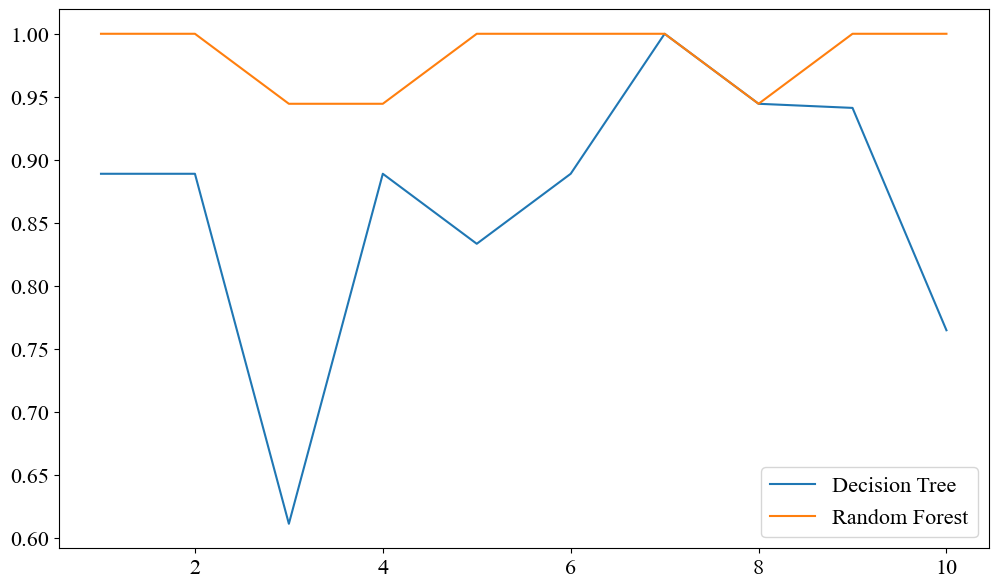

In [63]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc_score = cross_val_score(rfc, wine.data, wine.target, cv=10)

dtc = DecisionTreeClassifier()
dtc_score  = cross_val_score(dtc, wine.data, wine.target, cv=10)
plt.rcParams['font.size']= 16
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(12,7))
plt.plot(range(1,11), dtc_score, label='Decision Tree')
plt.plot(range(1,11), rfc_score, label='Random Forest')
plt.legend()
plt.show()
# 可以看到明显随机森林要比决策树要好点,

In [64]:
# 如果跑10次10折交叉验证,计算两者都均值,看看那种更平稳
dtc_list = []
rfc_list = []
for i in range(20):
    rfc = RandomForestClassifier(n_estimators=25, n_jobs=-1)
    rfc_score = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    dtc = DecisionTreeClassifier()
    dtc_score  = cross_val_score(dtc, wine.data, wine.target, cv=10).mean()
    dtc_list.append(dtc_score)
    rfc_list.append(rfc_score)

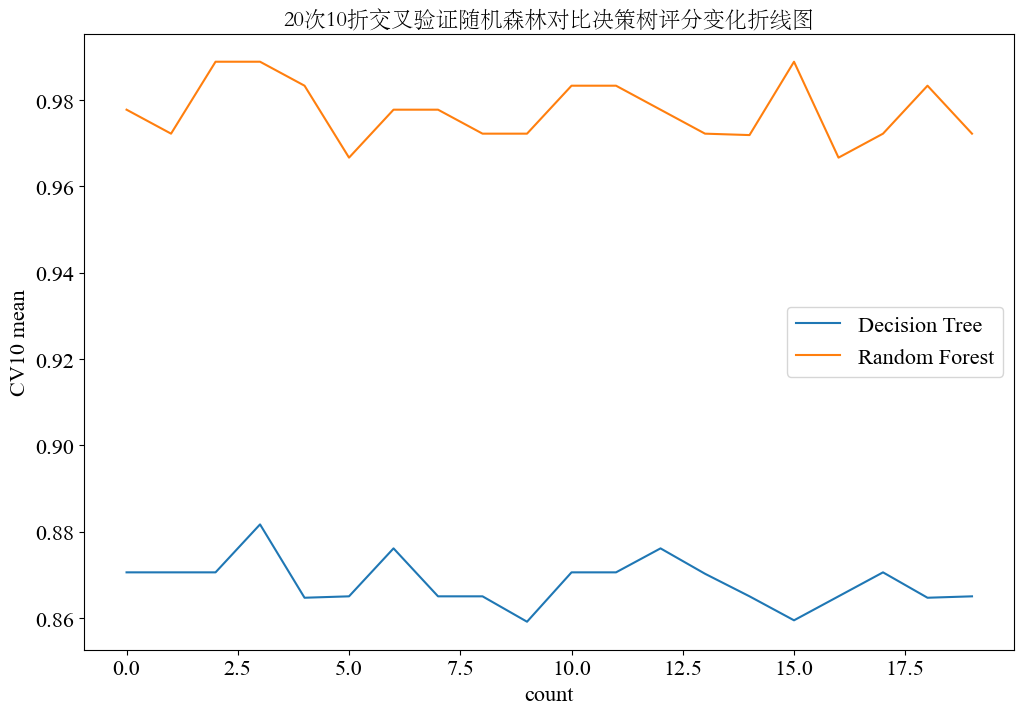

In [65]:
plt.figure(figsize=(12,8), dpi=100)
plt.plot(range(20), dtc_list, label='Decision Tree')
plt.plot(range(20), rfc_list, label='Random Forest')
plt.legend()
plt.xlabel('count')
plt.ylabel('CV10 mean')
plt.title('20次10折交叉验证随机森林对比决策树评分变化折线图', fontproperties='STsong')
plt.show()

In [66]:
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts

In [67]:
line = (Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(xaxis_data=[str(i) for i in range(20)])
    .add_yaxis('Random Forest', y_axis=[round(i,2) for i in rfc_list])
    .add_yaxis('Decision Tree', y_axis=[round(i,2) for i in dtc_list])  
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross'),
        yaxis_opts=opts.AxisOpts(max_=1, min_=0.8, splitline_opts={'show':False}),
        xaxis_opts=opts.AxisOpts(splitline_opts={'show':False}),
    )
)
line.render_notebook()

### 随机森林调参

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)


- n_estimators=100: 随机森林数目的个数, 增加数目的数量可以提高模型的稳定性和准确性,但是同时会增加计算成本和时间成本,这个大到一定的成都,随机森林精确性就开始波动...因此需要找一个合适的数值,这里建议,先确定大范围,然后在大范围中确定小范围....

- criterion:  用于衡量分类质量的函数,可以是gini,表示基尼系数, 或者entropy和log_loss

In [44]:
superpa = []

for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    
    superpa.append(rfc_s)

In [124]:
pd.Series(superpa).idxmax()

30

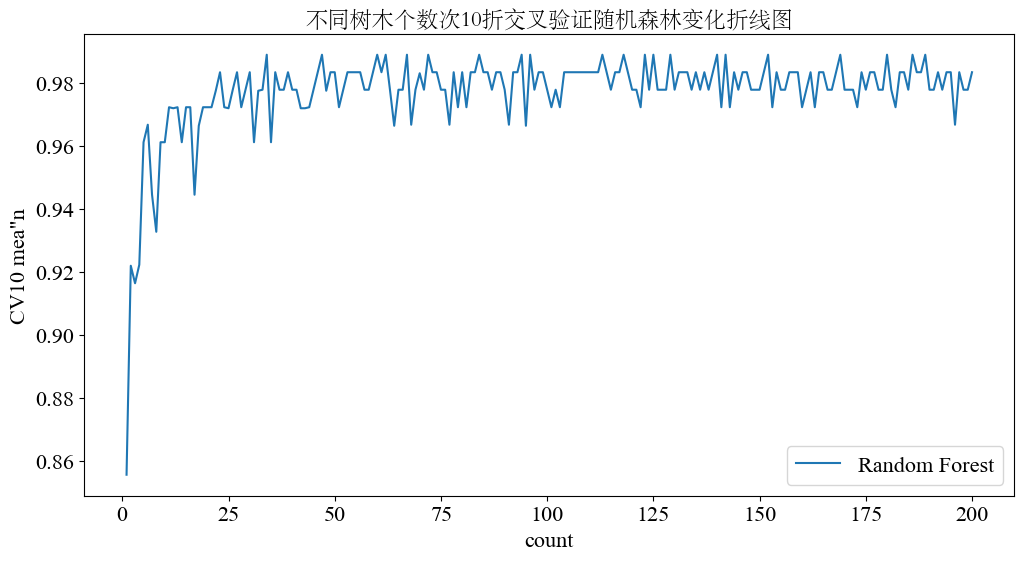

In [48]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(range(1,201), superpa, label='Random Forest')
plt.legend()
plt.xlabel('count')
plt.ylabel('CV10 mea"n')
plt.title('不同树木个数次10折交叉验证随机森林变化折线图', fontproperties='STsong')
plt.show()

In [54]:
print(max(superpa), superpa.index(max(superpa)))

0.9888888888888889 6

In [68]:
# 优化版本,先找大范围,大范围内确定小范围
superpa = []
for i in range(1,50,1):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    
    superpa.append(rfc_s)

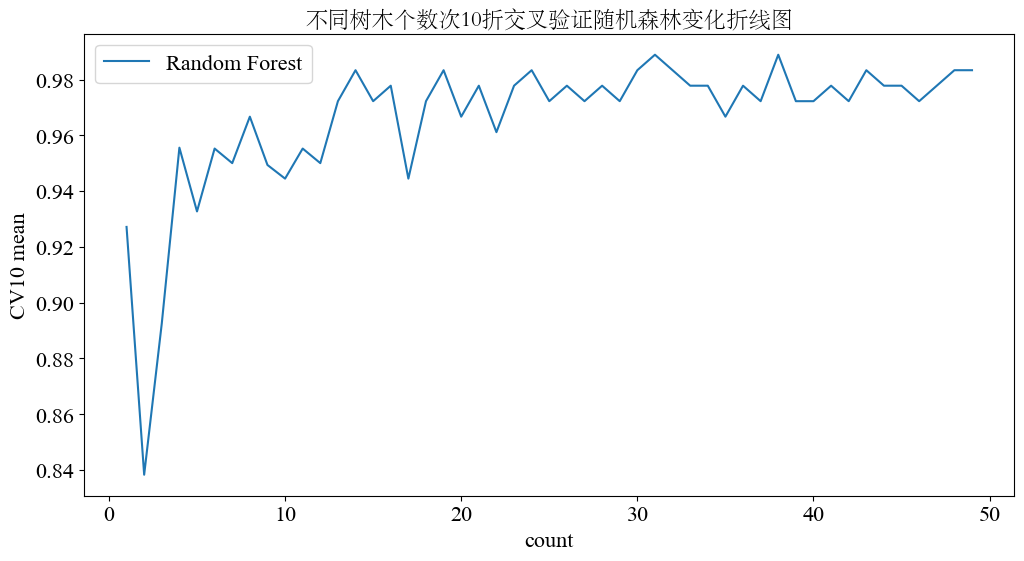

In [69]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(range(1,50,1), superpa, label='Random Forest')
plt.legend()
plt.xlabel('count')
plt.ylabel('CV10 mean')
plt.title('不同树木个数次10折交叉验证随机森林变化折线图', fontproperties='STsong')
plt.show()

随机森林使用了什么方法,来保证集成效果高于单个分类器

1. 引入了随机抽样的多样性
2. 减少单个基学习器的过拟合.

In [74]:
rfc = RandomForestClassifier(n_estimators=25, random_state=1210)

# 训练模型
rfc.fit(X_train, y_train)
for i in range(len(rfc.estimators_)):
#     print(f"树{i+1}的随机状态码为: {rfc.estimators_[i].random_state}")
    pass
print(rfc.feature_importances_)

[0.09917512 0.02488097 0.01078143 0.03095105 0.0282087  0.04132316
 0.14076099 0.01076923 0.0201677  0.23276944 0.11704181 0.11322872
 0.12994168]

## bootstrao 和 oob_socre

$$1 - (1 - \frac{1}{n})^n$$

当n足够大时, 这个概率收敛于 1 - (1/e)约等于0.632,因此差不多有37%的训练数据会被浪费的掉,没有参与建模,这些数据被称为袋外数据(out of bag data),简写为oob

In [79]:
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)

rfc.fit(wine.data, wine.target)

rfc.oob_score_ # 使用袋外数据查看 得分

0.9719101123595506

### 随机森林重要的参数

1. n_estimators: 树木的数量
2. ciiterion: 划分时采用的计算指标: gini, entropy, log_loss
3. max_depth: 树的最大深度
4. min_samples_split: 分割内部节点所需要最小样本数量
5. min_samples_leaf: 叶子节点所需要的最小样本数
6. max_features: 寻找最佳的分割时考虑的特征数量: sqrt, log2, None
7. min_weight_fraction_leaf: 叶子节点所需要最小权重分数.
8. max_leaf_noodes: 最大叶子节点数
9. min_impurity_decrease: 叶节点分割后杂质减少的最小值
10. bootstrap: 是否使用自助样本来构建决策树.
11. oob_score: 是否使用袋外样本来估计泛化得分.
12. njobs: 并行运行的任务数,
13. random_state: 随机数,控制样本自助和特征选择的随机性
14. class_weight: 与类别有关的权重,默认是1,
15. ccp_alpha: 用于最小成本复杂性简直的复杂性参数
16. max_samples: 如果bootstrap设定为True,这就是每个基学习器的样本数量,

### 随机森林中的重要参数

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification # 可以用于构建数据集
from sklearn.model_selection import train_test_split

In [92]:
# 导入make_classification函数，通常这个函数是从sklearn.datasets模块导入的
from sklearn.datasets import make_classification
# 参数解释：
# n_samples=1000：指定生成样本的数量为1000个
# n_features=20：指定每个样本的特征数量为20个
# n_informative=2：指定其中2个特征是有信息的，即对分类结果有影响的特征
# n_redundant=2：指定生成2个冗余特征，冗余特征是与其他特征线性相关的特征
# random_state=1210：设置随机种子，确保每次生成的数据集是相同的，以便于结果的可复现性

# 函数返回两个值：
# X：一个二维数组，包含了1000个样本，每个样本有20个特征
# y：一个一维数组，包含了1000个样本对应的分类标签
# 使用make_classification函数生成分类数据集
X, y = make_classification(n_samples=1000, n_features=20, 
                n_informative=2, n_redundant=2, random_state=1210)



In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1184)

In [102]:
rfc = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=220)

rfc.fit(X_train, y_train)

accuracy = rfc.score(X_test, y_test)
print(f'训练集得分: {accuracy}')

训练集得分: 0.9

In [115]:
rfc.feature_importances_ # 查看每个特征的重要性
rfc.apply(X_test) # 获取每个测试样本在每颗树中的叶子节点的索引
rfc.predict(X_test) # 获取预测的类别
rfc.predict_proba(X_test) # 获取每个测试样本的预测概率
rfc.oob_score_ # 获取袋外数据的分数

# ----------------------------------------

rfc.estimators_ # 随机森林中已有训练的决策树集合
rfc.estimator_ # 初始化的模板,用于创建随机森林中的每一课决策树
rfc.classes_ # 类别的标签
rfc.n_classes_ # 类别的数量
rfc.n_features_in_ # 模型在训练时使用的特征数量
rfc.n_outputs_ # 输出的目标数量

1

### bagging的另一个条件

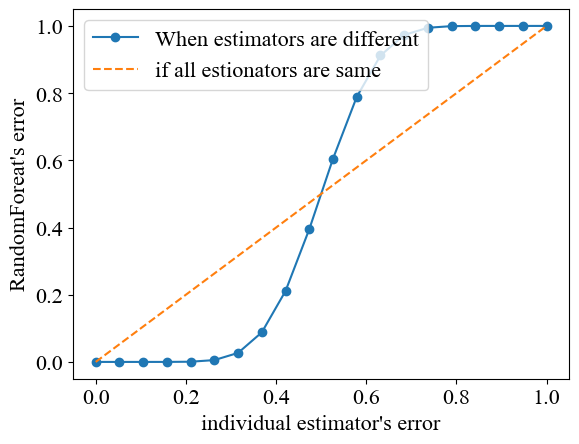

In [119]:
from scipy.special import comb

x = np.linspace(0,1, 20)
y = []

for eplsilon in np.linspace(0,1, 20):
    E = np.array([comb(25,i) *  \
     (eplsilon ** i) * ((1 - eplsilon) ** (25-i)) for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x, y, 'o-', label='When estimators are different')
plt.plot(x, x, '--', label = 'if all estionators are same')

plt.xlabel("individual estimator's error")
plt.ylabel("RandomForeat's error")

plt.legend()
plt.show()

## 决策树任务: 乳腺癌预测

In [122]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

data.data.shape

(569, 30)

## 任务目标: 使用随机森林和决策树分别对该数据集进行基本的预测工作,

1. 数据集的划分
2. 基本的建模
3. 两个模型的评估

4. 模型的准确率是否可以进行提升呢? 这时候你就要完成调参工作

5. 将找到的最优参数用于新的模型

In [125]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1210)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre

0.9666666666666666

### 调参第一步: 森林有多少颗树

0.968421052631579 8

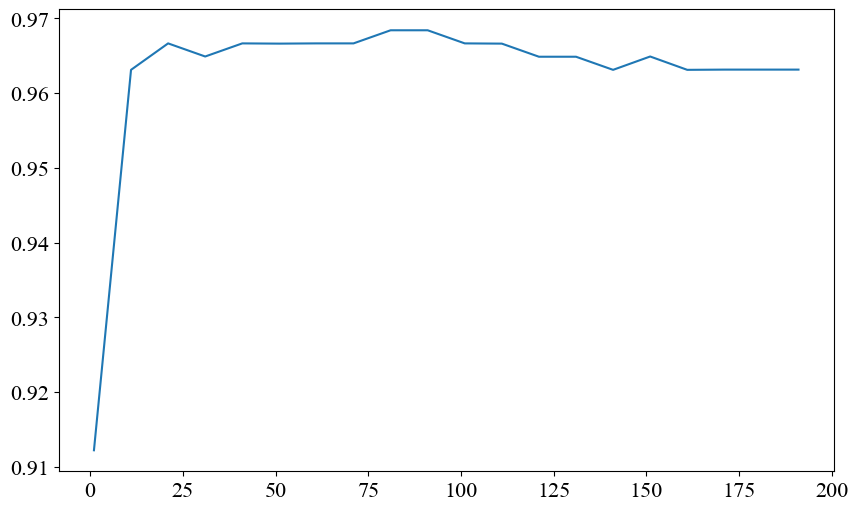

In [126]:
score_list = []
for i in range(1,200,10):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                 random_state=1210,
                                )
    score = cross_val_score(rfc, data.data, data.target, cv=10, ).mean()
    score_list.append(score)
    
print(max(score_list), (score_list.index(max(score_list))))
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1,200,10), score_list)
plt.show()

进一步调参范围在75-85之间,进行调参

0.9701754385964912 5

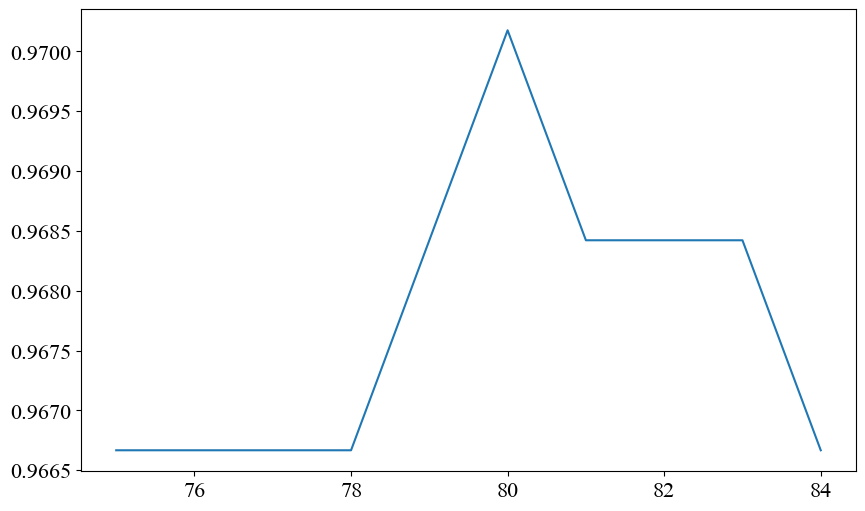

In [127]:
score_list = []
for i in range(75,85,1):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                 random_state=1210,
                                )
    score = cross_val_score(rfc, data.data, data.target, cv=10, ).mean()
    score_list.append(score)
    
print(max(score_list), (score_list.index(max(score_list))))
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(75,85,1), score_list)
plt.show()

In [134]:
# 调整max_depth
param_grid = {
    'max_depth': np.arange(3,20,1),
}
rfc = RandomForestClassifier(n_estimators=80,random_state=1210)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs.fit(data.data, data.target)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=80,
                                              random_state=1210),
             n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             verbose=2)

In [139]:
gs.best_score_ # 最高的分数
gs.best_params_ # 最好的参数

{'max_depth': 8}

In [141]:
# 调整max_features
param_grid = {
    'max_features': np.arange(5,30,1)
}
rfc = RandomForestClassifier(n_estimators=80,max_depth=8,random_state=1210)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs.fit(data.data, data.target)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=80,
                                              random_state=1210),
             n_jobs=-1,
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             verbose=2)

In [142]:
gs.best_score_ # 最高的分数

0.9683744760130415

In [143]:
gs.best_params_ # 最好的参数

{'max_features': 5}

### criterion参数调整

In [145]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
}

In [146]:
rfc = RandomForestClassifier(n_estimators=80,max_depth=8,
                             max_features=5,
                             random_state=1210)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs.fit(data.data, data.target)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=5,
                                              n_estimators=80,
                                              random_state=1210),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             verbose=2)

In [147]:
gs.best_score_ # 最高的分数

0.9683744760130415

In [148]:
gs.best_params_ # 最好的参数

{'criterion': 'gini'}

### min_samples_split

In [149]:
param_grid = {
    'min_samples_split': np.arange(2,20,1),
}
rfc = RandomForestClassifier(n_estimators=80,max_depth=8,
                             max_features=5,
                             criterion='gini',
                             random_state=1210)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs.fit(data.data, data.target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features=5,
                                              n_estimators=80,
                                              random_state=1210),
             n_jobs=-1,
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             verbose=2)

In [151]:
gs.best_score_ # 最高的分数
gs.best_params_ # 最好的参数

{'min_samples_split': 2}

### 网格搜索准备工作

In [152]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [79, 80, 81], 
    'max_depth': np.arange(6,9,1),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': np.arange(2,5,1),
    'max_features': np.arange(3,6,1)
}

rfc = RandomForestClassifier()
gs = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
gs.fit(data.data, data.target)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([6, 7, 8]),
                         'max_features': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [79, 80, 81]},
             verbose=2)

In [153]:
gs.best_score_ # 最高的分数

0.9736376339077782

In [157]:
bt = gs.best_params_
bt

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 81}

In [182]:
rfc = RandomForestClassifier(
    n_estimators=bt['n_estimators'],
    criterion=bt['criterion'],
    max_depth=bt['max_depth'],
    max_features=bt['max_features'],
     min_samples_split=bt['min_samples_split'],
     n_jobs=-1,
    random_state=1210,
    )
rfc.fit(data.data, data.target)

RandomForestClassifier(criterion='log_loss', max_depth=8, max_features=4,
                       min_samples_split=3, n_estimators=81, n_jobs=-1,
                       random_state=1210)

In [183]:
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9701754385964912

In [184]:
score - score_pre

0.0035087719298246833